In [143]:
import pandas as pd
from datetime import datetime, timedelta
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

#### I. Data preparation

#### 1. Data reading

In [131]:
df = pd.read_csv('eth_data.csv')
#df.drop(['unused', 'otime', 'ctime'], axis=1, inplace=True)

In [132]:
df

,otime,o,h,l,c,vol,ctime,quoteAssetVolume,nTrades,buyBaseAssetV,buyQuoteAssetV,unused
0,2022-08-25,1656.56,1722.00,1653.68,1705.08,537031.12260,2022-08-25 23:59:59.999,9.114319e+08,767183.0,276683.07970,4.695750e+08,0
1,2022-08-24,1665.40,1694.13,1604.92,1656.56,744667.60780,2022-08-24 23:59:59.999,1.228170e+09,993324.0,371514.76370,6.129658e+08,0
2,2022-08-23,1624.65,1676.07,1563.76,1665.41,940246.93200,2022-08-23 23:59:59.999,1.528222e+09,1195279.0,466987.52630,7.589067e+08,0
3,2022-08-22,1618.13,1629.72,1529.92,1624.66,941192.89540,2022-08-22 23:59:59.999,1.483443e+09,1193059.0,468265.27690,7.381889e+08,0
4,2022-08-21,1576.03,1646.52,1562.34,1618.13,780662.60620,2022-08-21 23:59:59.999,1.255042e+09,1000876.0,396587.44190,6.377260e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1830,2017-08-21,299.10,346.52,294.60,323.29,5219.44542,2017-08-21 23:59:59.999,1.689472e+06,3925.0,4004.19967,1.297977e+06,0
1831,2017-08-20,289.41,300.53,282.85,299.10,2510.13871,2017-08-20 23:59:59.999,7.428479e+05,2038.0,2186.68739,6.475061e+05,0
1832,2017-08-19,293.31,299.90,278.00,290.91,2146.19773,2017-08-19 23:59:59.999,6.200226e+05,1795.0,1537.97550,4.447136e+05,0
1833,2017-08-18,302.00,311.79,283.94,293.96,9537.84646,2017-08-18 23:59:59.999,2.858947e+06,5658.0,7452.43542,2.240813e+06,0


#### 2. Volume & trades lagging by 1

In [133]:
todays_data = df.iloc[-1, :]
c = df.iloc[:-1, :][['otime', 'o', 'c']].reset_index(drop=True)
df = df.iloc[1:, :][['vol', 'nTrades']].reset_index(drop=True)
df = pd.concat([df, c], axis=1)

In [134]:
df

,vol,nTrades,otime,o,c
0,744667.60780,993324.0,2022-08-25,1656.56,1705.08
1,940246.93200,1195279.0,2022-08-24,1665.40,1656.56
2,941192.89540,1193059.0,2022-08-23,1624.65,1665.41
3,780662.60620,1000876.0,2022-08-22,1618.13,1624.66
4,914615.92260,1130991.0,2022-08-21,1576.03,1618.13
...,...,...,...,...,...
1829,5219.44542,3925.0,2017-08-22,321.04,309.80
1830,2510.13871,2038.0,2017-08-21,299.10,323.29
1831,2146.19773,1795.0,2017-08-20,289.41,299.10
1832,9537.84646,5658.0,2017-08-19,293.31,290.91


#### 3. Train test split

In [135]:
test = df.iloc[:30, :]
train = df.iloc[30: , :]

#### 4. Training model

In [136]:
est = sm.OLS(train['c'], train.drop(['c', 'otime'], axis=1))
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      c   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          2.494e+05
Date:                Fri, 26 Aug 2022   Prob (F-statistic):                        0.00
Time:                        01:18:41   Log-Likelihood:                         -10449.
No. Observations:                1804   AIC:                                  2.090e+04
Df Residuals:                    1801   BIC:                                  2.092e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### 5. Testing model

In [137]:
test['pred'] = est2.predict(test.drop(['c', 'otime'], axis=1))

C:\Users\louiz\AppData\Local\Temp\ipykernel_19432\2777532649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = est2.predict(test.drop(['c', 'otime'], axis=1))


C:\Users\louiz\AppData\Local\Temp\ipykernel_19432\1499199752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['otime'] = test['otime'].astype('datetime64')


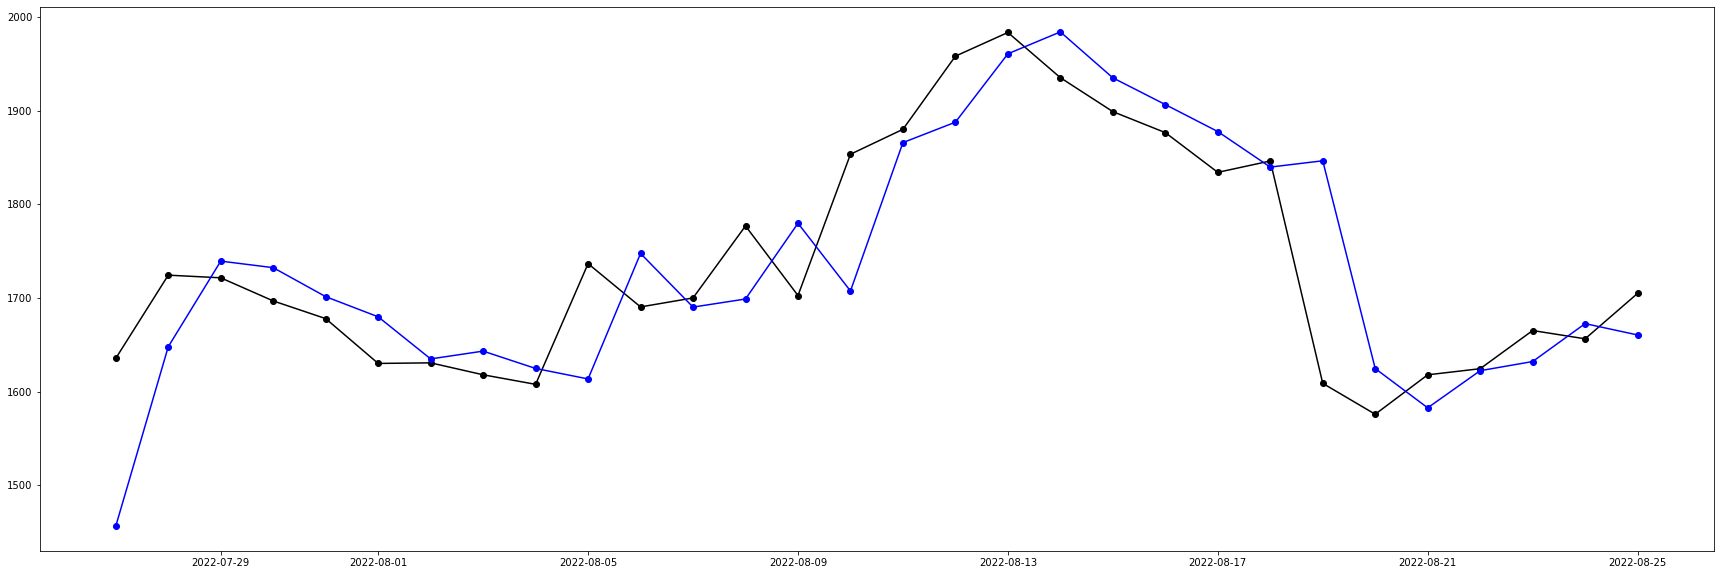

In [138]:
fig = plt.figure(figsize=(30, 10))
test['otime'] = test['otime'].astype('datetime64')
plt.plot(test['otime'], test['c'], '-o', color='black')
plt.plot(test['otime'], test['pred'], '-o', color='blue')
plt.show()

In [139]:
def get_state(row):
    if row.pred > row.o:
        return 'bull'
    else:
        return 'bear'

In [140]:
test['class_pred'] = test.apply(get_state, axis=1)

C:\Users\louiz\AppData\Local\Temp\ipykernel_19432\1307184012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['class_pred'] = test.apply(get_state, axis=1)


In [141]:
def get_real_state(row):
    if row.c > row.o:
        return 'bull'
    else:
        return 'bear'
test['class'] = test.apply(get_real_state, axis=1)

C:\Users\louiz\AppData\Local\Temp\ipykernel_19432\1221518526.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['class'] = test.apply(get_real_state, axis=1)


In [142]:
test

,vol,nTrades,otime,o,c,pred,class_pred,class
0,7.446676e+05,993324.0,2022-08-25,1656.56,1705.08,1660.668696,bull,bull
1,9.402469e+05,1195279.0,2022-08-24,1665.40,1656.56,1672.774625,bull,bear
2,9.411929e+05,1193059.0,2022-08-23,1624.65,1665.41,1632.300746,bull,bull
3,7.806626e+05,1000876.0,2022-08-22,1618.13,1624.66,1622.542299,bull,bull
4,9.146159e+05,1130991.0,2022-08-21,1576.03,1618.13,1582.893888,bull,bull
5,1.419827e+06,1681256.0,2022-08-20,1609.00,1576.04,1624.816128,bull,bear
6,6.062540e+05,848806.0,2022-08-19,1846.39,1609.01,1846.581749,bull,bear
7,9.518249e+05,1179058.0,2022-08-18,1834.24,1846.39,1839.869695,bull,bull
8,6.227291e+05,908578.0,2022-08-17,1876.67,1834.25,1877.793259,bull,bear
9,9.491623e+05,1295615.0,2022-08-16,1899.05,1876.67,1906.606827,bull,bear


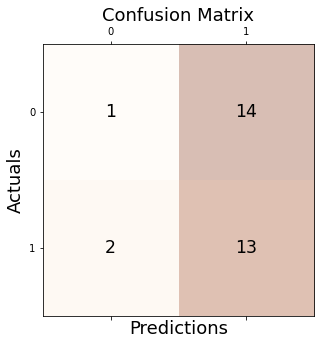

In [144]:
conf_matrix = confusion_matrix(y_true=test['class'], y_pred=test['class_pred'])
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### 6. Log transformations

In [115]:
for col in train.columns:
    if col not in ['otime']:
        train[col] = np.log(train[col])
        test[col] = np.log(test[col])

C:\Users\louiz\AppData\Local\Temp\ipykernel_19432\2245404815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = np.log(train[col])
C:\Users\louiz\AppData\Local\Temp\ipykernel_19432\2245404815.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col] = np.log(test[col])


In [116]:
est = sm.OLS(train['c'], train.drop(['c', 'otime'], axis=1))
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      c   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.610e+06
Date:                Fri, 26 Aug 2022   Prob (F-statistic):                        0.00
Time:                        01:13:12   Log-Likelihood:                          2720.1
No. Observations:                1804   AIC:                                     -5434.
Df Residuals:                    1801   BIC:                                     -5418.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [117]:
test['pred'] = est2.predict(test.drop(['c', 'otime', 'pred'], axis=1))

C:\Users\louiz\AppData\Local\Temp\ipykernel_19432\2236762183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = est2.predict(test.drop(['c', 'otime', 'pred'], axis=1))


C:\Users\louiz\AppData\Local\Temp\ipykernel_19432\2434707406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['otime'] = test['otime'].astype('datetime64')


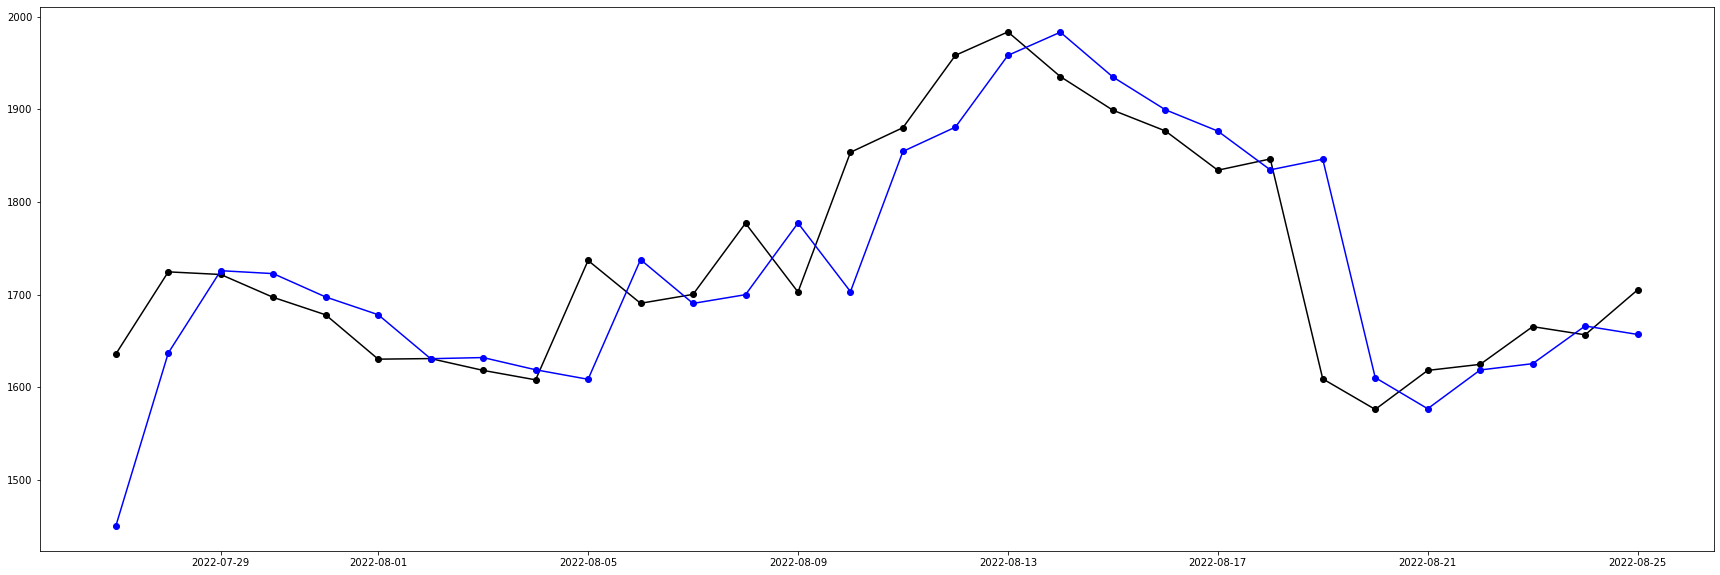

In [118]:
fig = plt.figure(figsize=(30, 10))
test['otime'] = test['otime'].astype('datetime64')
plt.plot(test['otime'], np.exp(test['c']), '-o', color='black')
plt.plot(test['otime'], np.exp(test['pred']), '-o', color='blue')
plt.show()